In [ ]:
from google.cloud import bigquery

client = bigquery.Client()

# Perform a query.
QUERY = (
    'SELECT * FROM `concise-faculty-452613-a1.brazil_e_commerce.fact_order_delivery_duration`')
query_job = client.query(QUERY)  # API request
rows = query_job.result()  # Waits for query to finish

for row in rows:
    print(row.name)

In [6]:
import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID.
project_id = "concise-faculty-452613-a1"

sql = """
SELECT customer_city, AVG(days_diff) AS average_delivery_days
FROM `concise-faculty-452613-a1.brazil_e_commerce.fact_order_delivery_duration`
GROUP BY customer_city
ORDER BY `customer_city`
"""
df = pandas_gbq.read_gbq(sql, project_id=project_id)

Downloading: 100%|██████████|


In [7]:
df.head()

,customer_city,average_delivery_days
0,abadia dos dourados,11.333333
1,abadiania,29.000000
2,abaete,9.916667
3,abaetetuba,26.545455
4,abaiara,35.000000


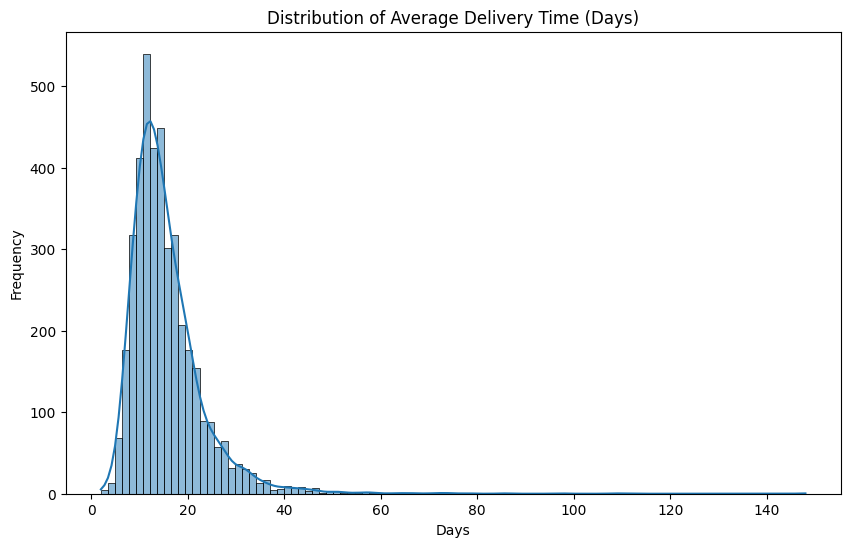

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['average_delivery_days'], bins=100, kde=True)
plt.title('Distribution of Average Delivery Time (Days)')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()